In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("super_messy_finance_dataset.csv")
data
data.head(50)

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after
0,1,2126,1018.38000,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,NaN,NaN,NaN,413090.78,412072.40
1,2,2459,188.23000,FoodPanda,NaN,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58.0,Male,3.512840e+05,650312.98,650124.75
2,3,1860,1459.03000,Daraz,NaN,2023-01-01 00:40:00,NaN,0,Mastercard,PKR,Islamabad,3.0,NaN,NaN,4.009500e+05,21792.23,20333.20
3,4,2294,327.93000,Careem,Travel,2023-01-01 01:00:00,tablet,0,NaN,USD,Dubai,4.4,32.0,Other,2.995290e+05,371922.62,371594.69
4,5,2130,746.37000,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59.0,Other,1.577610e+05,172581.86,171835.49
5,6,2095,951.51000,Bykea,Fuel,2023-01-01 01:40:00,tablet,0,NaN,EUR,London,3.5,NaN,Male,NaN,134800.48,133848.97
6,7,2724,2426.67000,NaN,NaN,2023-01-01 02:00:00,card,0,UnionPay,AED,NaN,4.1,46.0,Female,2.365180e+05,163713.16,161286.49
7,8,2044,2626.59000,Amazon,Fuel,2023-01-01 02:20:00,NaN,0,Visa,AED,NaN,1.5,41.0,Male,3.037640e+05,631890.72,629264.13
8,9,2638,908.10000,NaN,Shopping,2023-01-01 02:40:00,tablet,0,Amex,PKR,Dubai,3.3,32.0,Female,3.293500e+04,297918.56,297010.46
9,10,1121,2576.24000,Bykea,Electronics,2023-01-01 03:00:00,NaN,0,NaN,EUR,London,1.3,38.0,Female,4.348470e+05,165203.38,162627.14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    9500 non-null   int64  
 1   customer_id       9500 non-null   int64  
 2   amount            9500 non-null   float64
 3   merchant          7252 non-null   object 
 4   category          7127 non-null   object 
 5   transaction_time  9500 non-null   object 
 6   device            7132 non-null   object 
 7   is_fraud          9500 non-null   int64  
 8   card_type         7133 non-null   object 
 9   currency          9500 non-null   object 
 10  city              7189 non-null   object 
 11  merchant_rating   7126 non-null   float64
 12  age               7135 non-null   float64
 13  gender            7144 non-null   object 
 14  income            7180 non-null   float64
 15  balance_before    9500 non-null   float64
 16  balance_after     9500 non-null   float64


In [4]:
datetime = ['transaction_time']
for time in datetime:
    data[time]= pd.to_datetime(data[time])

In [5]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [6]:
cat_cols = ['merchant', 'category','device','card_type','gender', 'city']

data[cat_cols] = data[cat_cols].astype('category')


In [7]:
data['merchant_rating'] = pd.to_numeric(data['merchant_rating'], errors='coerce')


In [8]:
data['transaction_time'].dtype

dtype('<M8[ns]')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    9500 non-null   int64         
 1   customer_id       9500 non-null   int64         
 2   amount            9500 non-null   float64       
 3   merchant          7252 non-null   category      
 4   category          7127 non-null   category      
 5   transaction_time  9500 non-null   datetime64[ns]
 6   device            7132 non-null   category      
 7   is_fraud          9500 non-null   int64         
 8   card_type         7133 non-null   category      
 9   currency          9500 non-null   object        
 10  city              7189 non-null   category      
 11  merchant_rating   7126 non-null   float64       
 12  age               7135 non-null   float64       
 13  gender            7144 non-null   category      
 14  income            7180 n

In [10]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,NaN,NaN,NaN,413090.78,412072.40
1,2,2459,188.23,FoodPanda,NaN,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58.0,Male,351284.0,650312.98,650124.75
2,3,1860,1459.03,Daraz,NaN,2023-01-01 00:40:00,NaN,0,Mastercard,PKR,Islamabad,3.0,NaN,NaN,400950.0,21792.23,20333.20
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,NaN,USD,Dubai,4.4,32.0,Other,299529.0,371922.62,371594.69
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59.0,Other,157761.0,172581.86,171835.49


In [11]:
data.columns

Index(['transaction_id', 'customer_id', 'amount', 'merchant', 'category',
       'transaction_time', 'device', 'is_fraud', 'card_type', 'currency',
       'city', 'merchant_rating', 'age', 'gender', 'income', 'balance_before',
       'balance_after'],
      dtype='object')

In [12]:
print(data.isnull().sum())

transaction_id         0
customer_id            0
amount                 0
merchant            2248
category            2373
transaction_time       0
device              2368
is_fraud               0
card_type           2367
currency               0
city                2311
merchant_rating     2374
age                 2365
gender              2356
income              2320
balance_before         0
balance_after          0
dtype: int64


In [13]:
cat_cols = ['merchant', 'category', 'device', 'card_type', 'gender', 'city']

for col in cat_cols:
    if 'Unknown' not in data[col].cat.categories:
        data[col] = data[col].cat.add_categories('Unknown')
    data[col] = data[col].fillna('Unknown')


In [14]:
data['age'] = data['age'].fillna(data['age'].mean())


In [15]:
data['merchant_rating'] = data['merchant_rating'].fillna(data['merchant_rating'].mean())


In [16]:
data['income'] = data['income'].fillna(data['income'].mean())


In [17]:
duplicates_exist = data['customer_id'].duplicated().any()

if duplicates_exist:
    print("Duplicates exist in the column ✅")
else:
    print("No duplicates in the column ✅")


Duplicates exist in the column ✅


In [18]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,43.962999,Unknown,334045.924984,413090.78,412072.40
1,2,2459,188.23,FoodPanda,Unknown,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58.000000,Male,351284.000000,650312.98,650124.75
2,3,1860,1459.03,Daraz,Unknown,2023-01-01 00:40:00,Unknown,0,Mastercard,PKR,Islamabad,3.0,43.962999,Unknown,400950.000000,21792.23,20333.20
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,Unknown,USD,Dubai,4.4,32.000000,Other,299529.000000,371922.62,371594.69
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59.000000,Other,157761.000000,172581.86,171835.49


In [19]:
print(data.isnull().sum())

transaction_id      0
customer_id         0
amount              0
merchant            0
category            0
transaction_time    0
device              0
is_fraud            0
card_type           0
currency            0
city                0
merchant_rating     0
age                 0
gender              0
income              0
balance_before      0
balance_after       0
dtype: int64


Fraud rate by transaction category

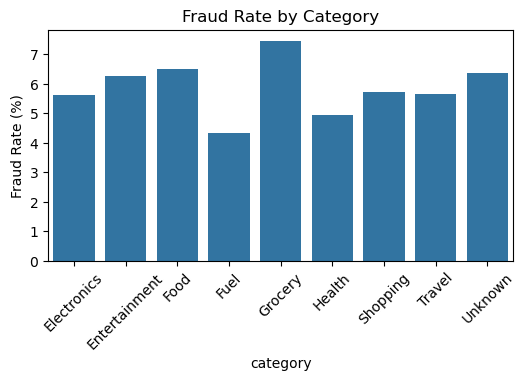

In [21]:
# Group by category
category_fraud = data.groupby('category', observed=True)['is_fraud'].agg(['count', 'sum'])

category_fraud['fraud_rate'] = (category_fraud['sum'] / category_fraud['count']) * 100

plt.figure(figsize=(6,3))
sns.barplot(x=category_fraud.index, y=category_fraud['fraud_rate'])
plt.xticks(rotation=45)
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Category')
plt.show() 

         count  sum  fraud_rate
device                         
mobile    1781  118    6.625491
Unknown   2368  147    6.207770
card      1824  108    5.921053
web       1788   99    5.536913
tablet    1739   93    5.347901


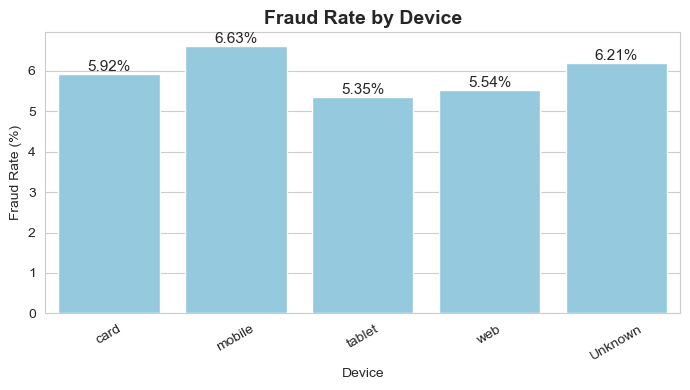

In [22]:

# Device fraud calculation
device_fraud = data.groupby('device', observed=True)['is_fraud'].agg(['count', 'sum'])
device_fraud['fraud_rate'] = (device_fraud['sum'] / device_fraud['count']) * 100
device_fraud = device_fraud.sort_values('fraud_rate', ascending=False)
print(device_fraud)

# Plot
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=device_fraud.index,
    y=device_fraud['fraud_rate'],
    color="skyblue"  # single color
)

plt.xticks(rotation=30)
plt.xlabel('Device')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Device', fontsize=14, weight='bold')

# Text at the top of each bar using bar patches
for bar in ax.patches:
    height = bar.get_height()  # actual bar height
    ax.text(
        bar.get_x() + bar.get_width()/2,  # center of bar
        height,                           # exact top of bar
        f"{height:.2f}%",                 # text
        ha='center',
        va='bottom',                       # align bottom of text to bar top
        fontsize=11
    )

plt.tight_layout()
plt.show()



In [23]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,43.962999,Unknown,334045.924984,413090.78,412072.40
1,2,2459,188.23,FoodPanda,Unknown,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58.000000,Male,351284.000000,650312.98,650124.75
2,3,1860,1459.03,Daraz,Unknown,2023-01-01 00:40:00,Unknown,0,Mastercard,PKR,Islamabad,3.0,43.962999,Unknown,400950.000000,21792.23,20333.20
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,Unknown,USD,Dubai,4.4,32.000000,Other,299529.000000,371922.62,371594.69
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59.000000,Other,157761.000000,172581.86,171835.49


In [24]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'])
data['month'] = data['transaction_time'].dt.to_period('M')
monthly_avg_spending = (
    data
    .groupby(['customer_id', 'month'])['amount']
    .mean()
    .reset_index(name='avg_monthly_spend')
)
print(monthly_avg_spending.head(19))



    customer_id    month  avg_monthly_spend
0          1000  2023-01        1356.830000
1          1000  2023-02        1446.030000
2          1000  2023-03        1827.255000
3          1000  2023-04        2805.550000
4          1000  2023-05         324.610000
5          1001  2023-01         194.475000
6          1001  2023-02        2346.896667
7          1002  2023-01        2216.780000
8          1002  2023-03        1085.115000
9          1003  2023-01        1513.960000
10         1003  2023-04           4.610000
11         1004  2023-01        1941.925000
12         1004  2023-03         652.200000
13         1004  2023-04         241.020000
14         1005  2023-01        2054.490000
15         1005  2023-04        1593.112500
16         1006  2023-01         493.650000
17         1006  2023-02         348.310000
18         1006  2023-03          72.130000


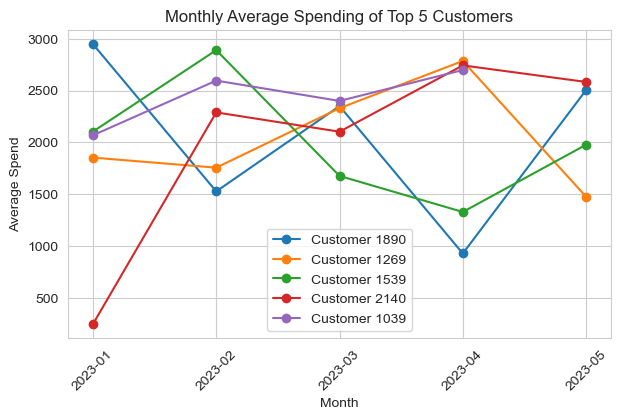

In [25]:


# Top 5 customers by total spending
top_customers = monthly_avg_spending.groupby('customer_id')['avg_monthly_spend'].sum().nlargest(5).index
data_top = monthly_avg_spending[monthly_avg_spending['customer_id'].isin(top_customers)]

plt.figure(figsize=(7,4))

for cid in top_customers:
    temp = data_top[data_top['customer_id'] == cid].sort_values('month')
    plt.plot(temp['month'].astype(str), temp['avg_monthly_spend'], marker='o', label=f'Customer {cid}')

plt.title("Monthly Average Spending of Top 5 Customers")
plt.xlabel("Month")
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



In [26]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after,month
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,43.962999,Unknown,334045.924984,413090.78,412072.40,2023-01
1,2,2459,188.23,FoodPanda,Unknown,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58.000000,Male,351284.000000,650312.98,650124.75,2023-01
2,3,1860,1459.03,Daraz,Unknown,2023-01-01 00:40:00,Unknown,0,Mastercard,PKR,Islamabad,3.0,43.962999,Unknown,400950.000000,21792.23,20333.20,2023-01
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,Unknown,USD,Dubai,4.4,32.000000,Other,299529.000000,371922.62,371594.69,2023-01
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59.000000,Other,157761.000000,172581.86,171835.49,2023-01


In [27]:
data['age'] = data['age'].astype(int)


In [28]:
data['category'].value_counts()


category
Unknown          2373
Electronics       964
Shopping          960
Entertainment     926
Travel            883
Fuel              855
Health            848
Grocery           846
Food              845
Name: count, dtype: int64

In [29]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after,month
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,43,Unknown,334045.924984,413090.78,412072.40,2023-01
1,2,2459,188.23,FoodPanda,Unknown,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58,Male,351284.000000,650312.98,650124.75,2023-01
2,3,1860,1459.03,Daraz,Unknown,2023-01-01 00:40:00,Unknown,0,Mastercard,PKR,Islamabad,3.0,43,Unknown,400950.000000,21792.23,20333.20,2023-01
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,Unknown,USD,Dubai,4.4,32,Other,299529.000000,371922.62,371594.69,2023-01
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59,Other,157761.000000,172581.86,171835.49,2023-01


In [30]:
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
demo_category_spend = (
    data
    .groupby(['age_group', 'gender', 'category'])['amount']
    .sum()
    .reset_index()
)
demo_category_spend = demo_category_spend.sort_values(
    by='amount',
    ascending=False
)
print(demo_category_spend )

    age_group   gender       category         amount
89      36-45     Male        Unknown  354559.308270
107     36-45  Unknown        Unknown  341946.176484
80      36-45   Female        Unknown  336088.372634
98      36-45    Other        Unknown  299883.604610
125     46-60     Male        Unknown  177224.520146
..        ...      ...            ...            ...
5       18-25   Female         Health   18583.619119
6       18-25   Female       Shopping   18516.570315
27      18-25  Unknown    Electronics   18248.632883
19      18-25    Other  Entertainment   17457.000000
68      26-35  Unknown         Health   16663.765673

[180 rows x 4 columns]


C:\Users\TLS\AppData\Local\Temp\ipykernel_14912\2758115173.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'gender', 'category'])['amount']


In [31]:
data.head()

,transaction_id,customer_id,amount,merchant,category,transaction_time,device,is_fraud,card_type,currency,city,merchant_rating,age,gender,income,balance_before,balance_after,month,age_group
0,1,2126,1018.38,Al-Fatah,Shopping,2023-01-01 00:00:00,tablet,0,UnionPay,AED,Dubai,2.7,43,Unknown,334045.924984,413090.78,412072.40,2023-01,36-45
1,2,2459,188.23,FoodPanda,Unknown,2023-01-01 00:20:00,mobile,0,UnionPay,USD,London,3.9,58,Male,351284.000000,650312.98,650124.75,2023-01,46-60
2,3,1860,1459.03,Daraz,Unknown,2023-01-01 00:40:00,Unknown,0,Mastercard,PKR,Islamabad,3.0,43,Unknown,400950.000000,21792.23,20333.20,2023-01,36-45
3,4,2294,327.93,Careem,Travel,2023-01-01 01:00:00,tablet,0,Unknown,USD,Dubai,4.4,32,Other,299529.000000,371922.62,371594.69,2023-01,26-35
4,5,2130,746.37,Amazon,Travel,2023-01-01 01:20:00,card,0,UnionPay,AED,Karachi,3.3,59,Other,157761.000000,172581.86,171835.49,2023-01,46-60


C:\Users\TLS\AppData\Local\Temp\ipykernel_14912\125597635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_fraud = data.groupby('card_type')['is_fraud'].agg(['count','sum'])


            count  sum  fraud_rate
card_type                         
UnionPay     1736  120    6.912442
Mastercard   1780  109    6.123596
Unknown      2367  140    5.914660
Visa         1793   99    5.521472
Amex         1824   97    5.317982


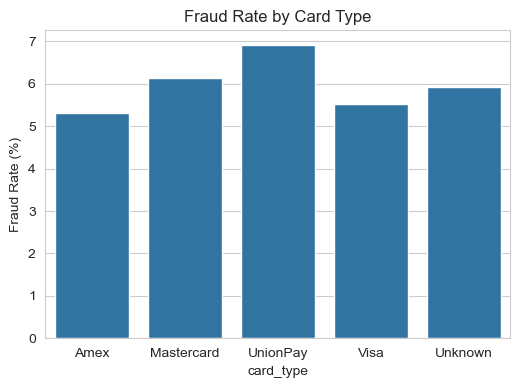

In [68]:
card_fraud = data.groupby('card_type')['is_fraud'].agg(['count','sum'])
card_fraud['fraud_rate'] = (card_fraud['sum']/card_fraud['count'])*100

print(card_fraud.sort_values('fraud_rate', ascending=False))

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=card_fraud.index, y=card_fraud['fraud_rate'])
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Card Type')
plt.show()
